# Estudo sobre Modelo de Classificação

## Importações

In [1]:
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt

In [3]:
#from feature_engine.imputation import CategoricalImputer

In [4]:
from imblearn.over_sampling import RandomOverSampler

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics

In [6]:
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
df_treino = pd.read_csv("marketing_training.csv")

In [9]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

## Exploração Dataset

In [10]:
df_treino.describe()

custAge     campaign        pdays     previous  emp.var.rate  \
count  5610.000000  7414.000000  7414.000000  7414.000000   7414.000000   
mean     40.009804     2.518344   960.024548     0.184111      0.052091   
std      10.574616     2.695055   192.845029     0.516775      1.568399   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      94.000000    40.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed      pmonths  \
count     7414.000000    7414.000000  7414.000000  7414.000000  7414.000000   
mean        93.570708     -40.561316     3.583141  5165.224251   959.797028   
std          0.578345       4.649800     1.744865    73.108669   193.969418   
min         92.201000     -50.800000     0.634000  4963.600000     0.000000   
25%         93.075000     -42.700000     1.334000  5099.100000   999.000000   
50%         93.444000     -41.800000     4.857000  5191.000000   999.000000   
75%         93.994000     -36.400000     4.961000  5228.100000   999.000000   
max         94.767000     -26.900000     5.045000  5228.100000   999.000000   

         pastEmail  
count  7414.000000  
mean      0.361883  
std       1.261668  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      18.000000

In [11]:
df_treino.responded.value_counts()

no     6574
yes     840
Name: responded, dtype: int64

O dataset não está balanceado em relação a variável a ser classificada, um ponto de atenção para utilização de algum método de sample (over|under) no momento da modelagem

In [12]:
df_treino.head()

custAge   profession   marital          schooling  default housing loan  \
0     55.0       admin.    single  university.degree  unknown      no   no   
1      NaN  blue-collar   married                NaN       no      no   no   
2     42.0   technician   married        high.school       no      no   no   
3     55.0   management  divorced                NaN  unknown     yes  yes   
4      NaN       admin.  divorced  university.degree       no     yes   no   

     contact month day_of_week  ...  previous     poutcome  emp.var.rate  \
0   cellular   nov         mon  ...         0  nonexistent          -0.1   
1   cellular   jul         mon  ...         0  nonexistent           1.4   
2  telephone   may         mon  ...         0  nonexistent           1.1   
3   cellular   jul         wed  ...         0  nonexistent           1.4   
4   cellular   may         tue  ...         1      failure          -1.8   

  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  pmonths  pastEmail  \
0         93.200          -42.0      4.191       5195.8    999.0          0   
1         93.918          -42.7      4.960       5228.1    999.0          0   
2         93.994          -36.4      4.857       5191.0    999.0          0   
3         93.918          -42.7      4.962       5228.1    999.0          0   
4         92.893          -46.2      1.291       5099.1    999.0          1   

   responded  
0         no  
1         no  
2         no  
3         no  
4         no  

[5 rows x 22 columns]

<H4> Verificando as distribuições e correlações das variáveis presentes do dataset

In [13]:
df_treino.describe()

custAge     campaign        pdays     previous  emp.var.rate  \
count  5610.000000  7414.000000  7414.000000  7414.000000   7414.000000   
mean     40.009804     2.518344   960.024548     0.184111      0.052091   
std      10.574616     2.695055   192.845029     0.516775      1.568399   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      94.000000    40.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed      pmonths  \
count     7414.000000    7414.000000  7414.000000  7414.000000  7414.000000   
mean        93.570708     -40.561316     3.583141  5165.224251   959.797028   
std          0.578345       4.649800     1.744865    73.108669   193.969418   
min         92.201000     -50.800000     0.634000  4963.600000     0.000000   
25%         93.075000     -42.700000     1.334000  5099.100000   999.000000   
50%         93.444000     -41.800000     4.857000  5191.000000   999.000000   
75%         93.994000     -36.400000     4.961000  5228.100000   999.000000   
max         94.767000     -26.900000     5.045000  5228.100000   999.000000   

         pastEmail  
count  7414.000000  
mean      0.361883  
std       1.261668  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      18.000000

In [14]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [15]:
df_treino.select_dtypes(include=['int64']).columns.values

array(['campaign', 'pdays', 'previous', 'pastEmail'], dtype=object)

In [16]:
#discret_columns = df_treino.select_dtypes(include=['int64']).columns.values.tolist()
string_columns = df_treino.select_dtypes(include=['object']).columns.values.tolist()
numerical_columns = df_treino.select_dtypes(include=['int64','float64']).columns.values.tolist()

In [17]:
string_columns.remove('responded')

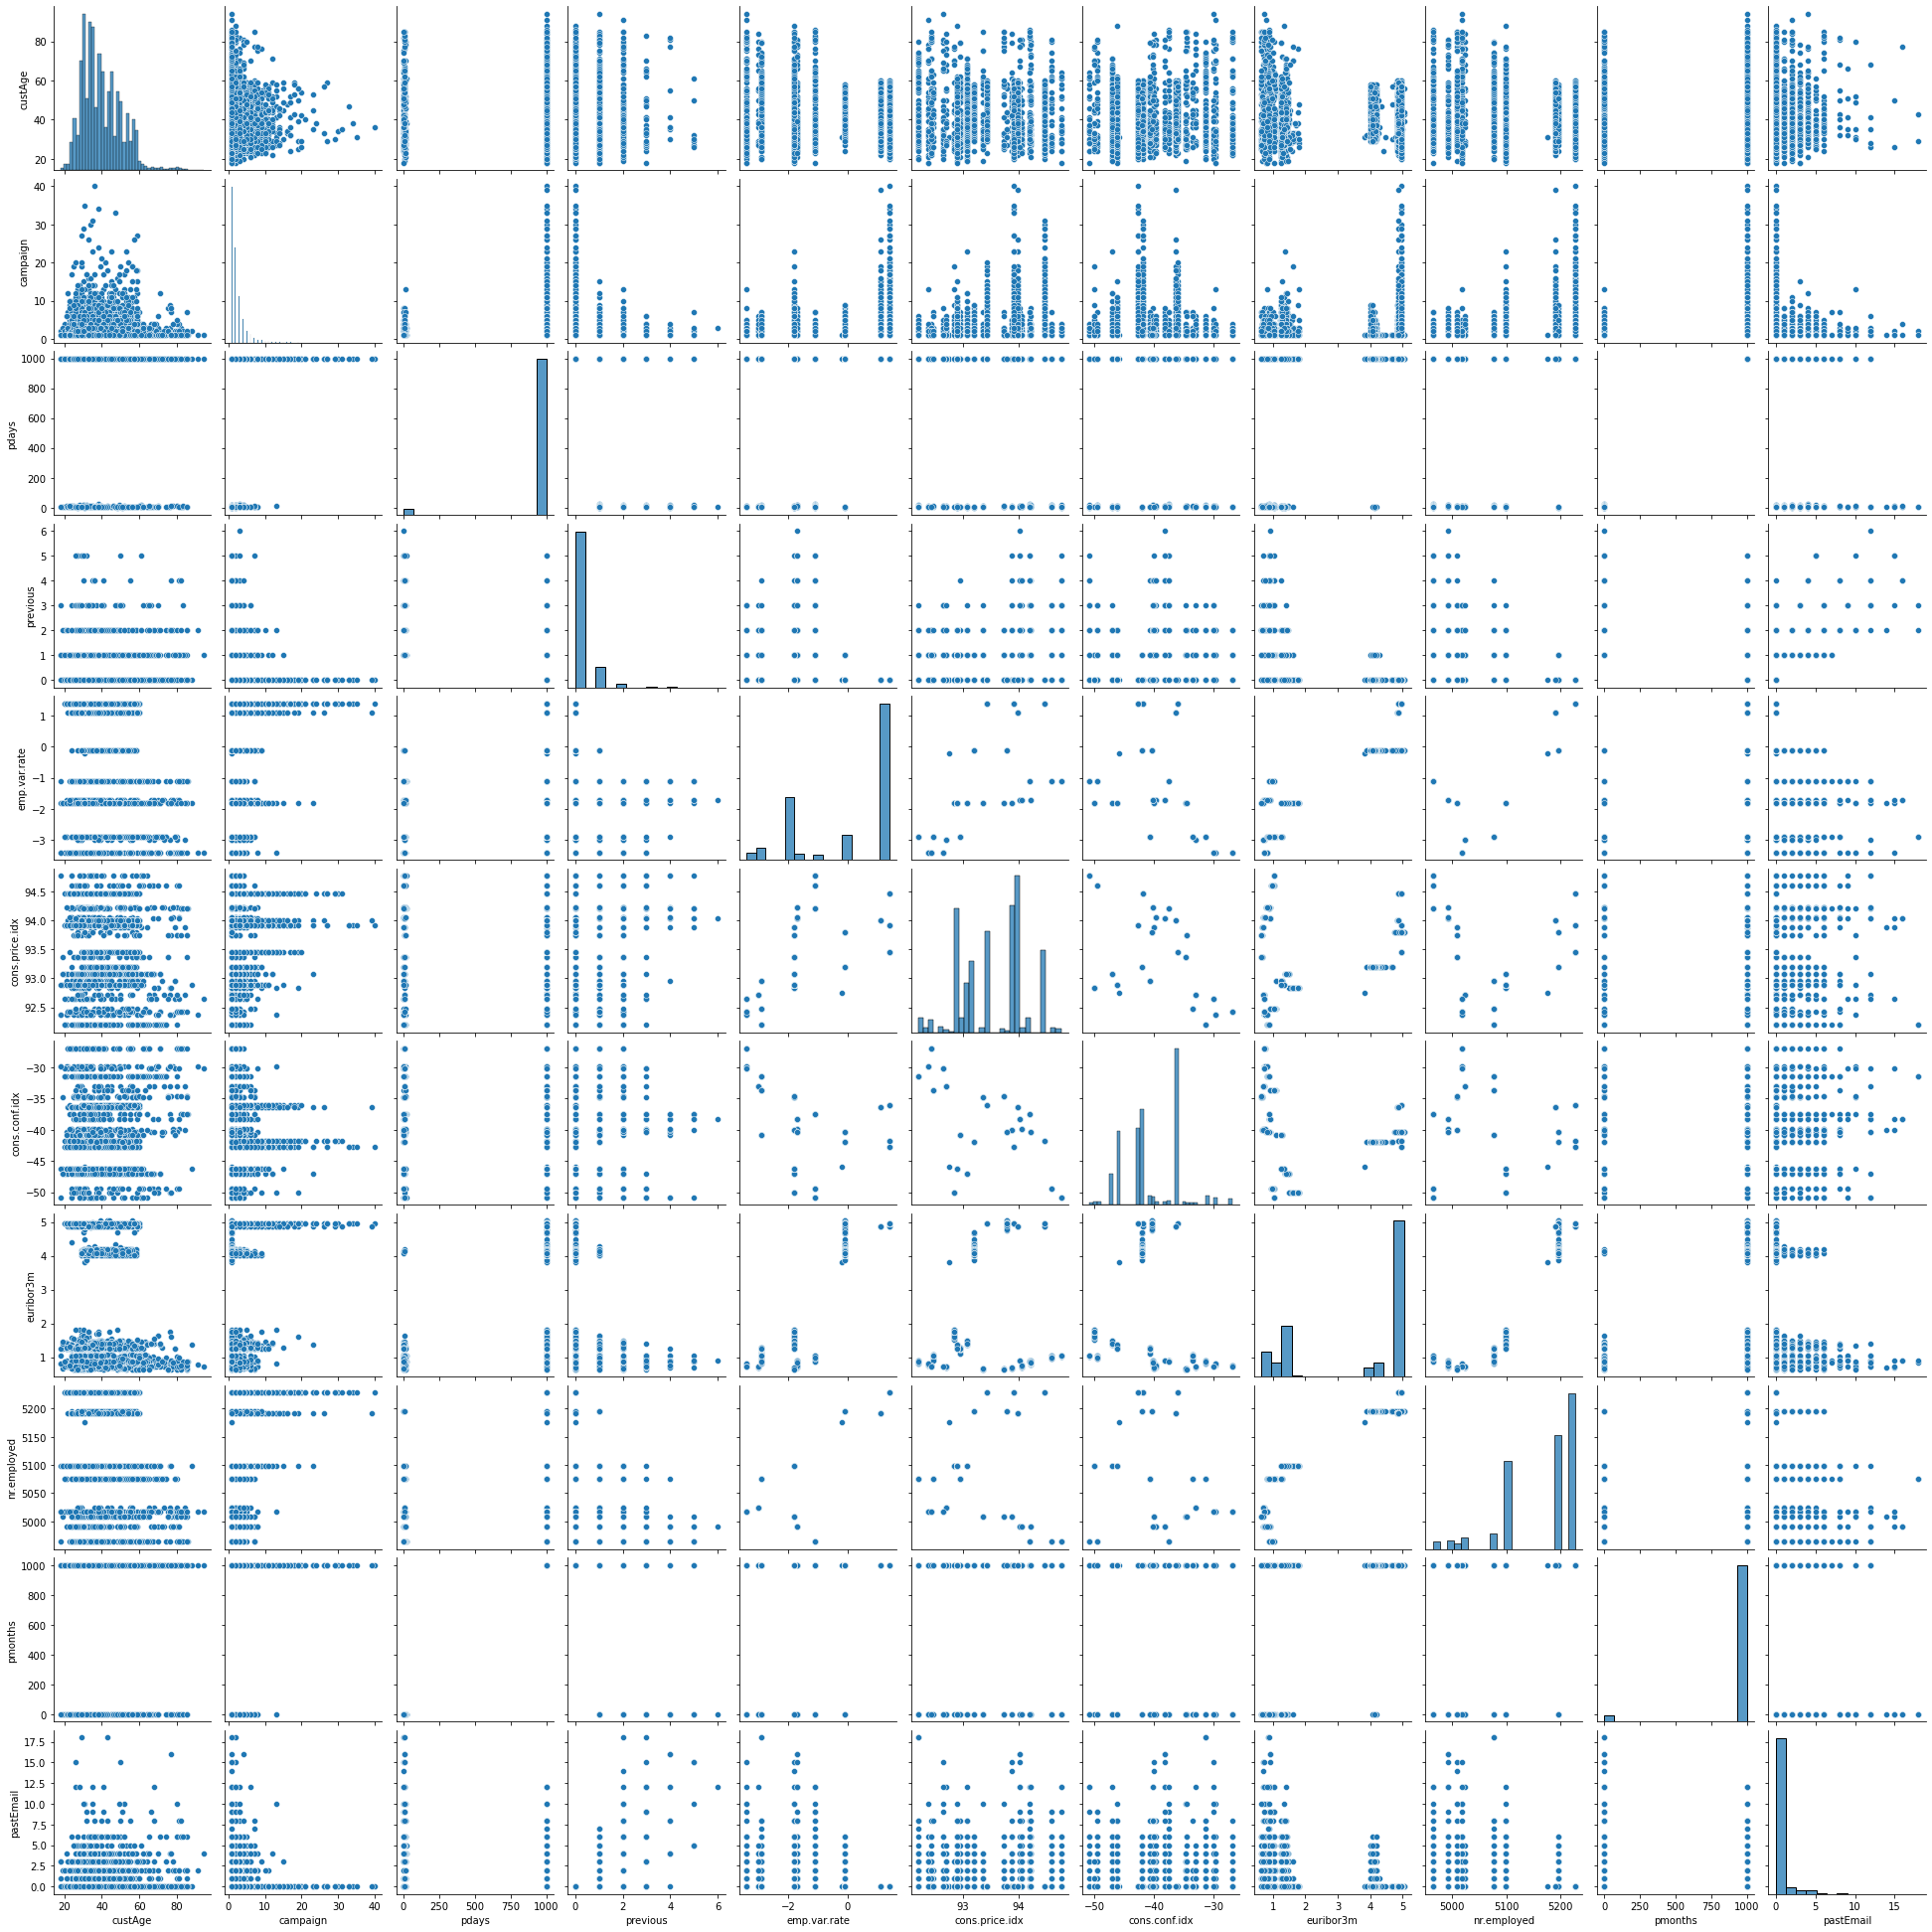

In [18]:
sns.pairplot(df_treino)

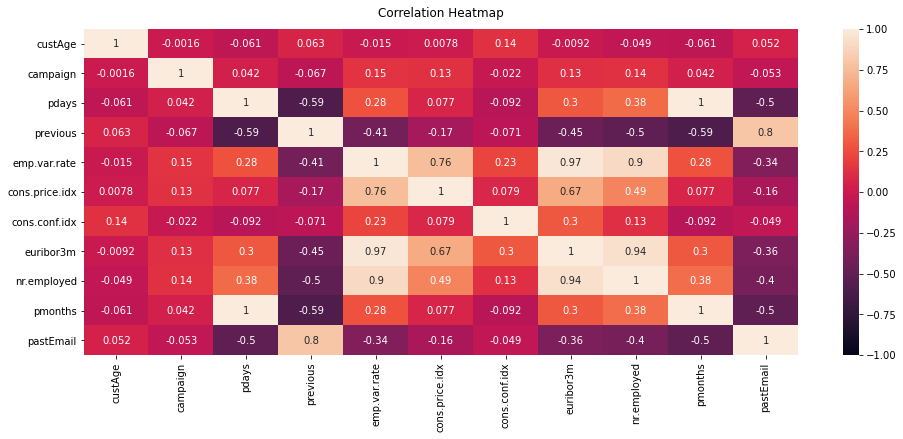

In [19]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_treino[numerical_columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [20]:
for v in string_columns:
    fig = px.box(df_treino, x=v, y="custAge")
    fig.show()

A coluna <i> nr.employed </i> tem uma forte correlação entre outras variáveis, poderíamos retirar ela do modelo afin de reduzir a complexidade.

## Pré processamento

In [21]:
X = df_treino.drop(['responded'], axis=1)
y = df_treino['responded'].apply(lambda x: 1 if x == 'yes' else 0)

In [22]:
y.value_counts()

0    6574
1     840
Name: responded, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [25]:
y_resampled.value_counts()

1    4632
0    4632
Name: responded, dtype: int64

<h3> Split train test </h3>
Escolhi fazer o split de treino e de teste nesse momento pensando sobre caso eu vá utilizar um pré processoamento dos dados eu não quero que ocorra vazamento das informações do test em treino. 
Não sei se é o melhor approach, mas segui dessa maneira.

In [26]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9264 entries, 0 to 9263
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         7014 non-null   float64
 1   profession      9264 non-null   object 
 2   marital         9264 non-null   object 
 3   schooling       6568 non-null   object 
 4   default         9264 non-null   object 
 5   housing         9264 non-null   object 
 6   loan            9264 non-null   object 
 7   contact         9264 non-null   object 
 8   month           9264 non-null   object 
 9   day_of_week     8372 non-null   object 
 10  campaign        9264 non-null   int64  
 11  pdays           9264 non-null   int64  
 12  previous        9264 non-null   int64  
 13  poutcome        9264 non-null   object 
 14  emp.var.rate    9264 non-null   float64
 15  cons.price.idx  9264 non-null   float64
 16  cons.conf.idx   9264 non-null   float64
 17  euribor3m       9264 non-null   f

In [27]:
X_resampled.day_of_week.value_counts()

thu    1814
tue    1697
mon    1663
fri    1601
wed    1597
Name: day_of_week, dtype: int64

In [28]:
X_resampled.schooling.value_counts()

university.degree      2126
high.school            1421
basic.9y                845
professional.course     834
basic.4y                630
unknown                 388
basic.6y                323
illiterate                1
Name: schooling, dtype: int64

<p> Como vou tratar os missing values: Para o valor de <i>custAge</i>, dada a correlação e distribuição vou utilizar a média de valores com o agrupamento relativo a profession e marital. <p>
<p> No caso das variáveis categóricas vou utilizar duas formas, a primeira para o <i>schooling</i> que utilizarei a frequencia mais comum. <p>
<p> No caso do <i>day_of_week</i>, pela distribuição homogênea entre os dias vou utilizar a variável categórica nula como uma nova variável.<p> 

In [29]:
# Tratamento da variável de Idade
X_resampled.custAge.fillna(X_resampled.groupby(['marital','profession'])['custAge'].transform('mean'), inplace=True)

X_test.custAge.fillna(X_test.groupby(['marital','profession'])['custAge'].transform('mean'), inplace=True)

In [30]:
# Tratamento da variável day_of_week
X_resampled.day_of_week.fillna("desconhecido", inplace=True)
X_test.day_of_week.fillna("desconhecido", inplace=True)

In [31]:
# Tratamento da variável day_of_week
X_resampled.schooling.fillna("university.degree", inplace=True)
X_test.schooling.fillna("university.degree", inplace=True)

In [32]:
X_resampled.isnull().sum()

custAge           1
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [33]:
X_test.isnull().sum()

custAge           1
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [34]:
#print(f' Colunas discretas :{discret_columns}')
print(f' Colunas categóricas :{string_columns}')
print(f' Colunas numéricas :{numerical_columns}')

 Colunas categóricas :['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
 Colunas numéricas :['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']


## Teste de modelo (Pipeline)

In [35]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_columns),
        ("cat", categorical_transformer, string_columns),
    ]
)

In [36]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [37]:
clf.fit(X_resampled, y_resampled)
print(f'model score: {(clf.score(X_test, y_test)):.3f}')

model score: 0.813


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Funções

In [38]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Positive','Negative']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)

In [39]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [40]:
def plot_roc (X_treino,X_test,y_treino,y_test,model):
    y_pred_proba1 = model.predict_proba(X_treino)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y_treino,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y_treino, y_pred_proba1)
    y_pred_proba2 = model.predict_proba(X_test)[::,1]
    fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
    auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
    
    line1, = plt.plot(fpr1, tpr1, 'b', label="AUC="+str(auc1))
    line2, = plt.plot(fpr2, tpr2, 'r', label="AUC="+str(auc2))
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [41]:
def evaluate(classifier, X_tes, th, y_tes):
    y_prd = [1 if x > th else 0 for x in classifier.predict_proba(X_tes)[:, 1]]
    print(metrics.classification_report(y_tes, y_prd))
    
    return y_prd

In [42]:
def plot_precision_recall_curve(classifier, X_tes,y_tes):
    y_scores = classifier.predict_proba(X_tes)[:, 1]
    yn_tes = np.where(y_tes == 1, 1, 0)

    precisions, recalls, thresholds = metrics.precision_recall_curve(yn_tes, y_scores)

    plt.title('Precision and Recall Scores as a function of the decision threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.ylabel('Score')
    plt.xlabel('Decision Threshold')
    plt.legend(loc='best')

## Modelos

In [43]:
X_train_transformed = preprocessor.fit_transform(X_resampled)
X_test_transformed = preprocessor.transform(X_test)
X_resampled_transformed = preprocessor.transform(X)

In [44]:
print(f'{X_train_transformed.shape}')
print(f'{y_resampled.shape}')
print(f'{X_test_transformed.shape}')
print(f'{y_test.shape}')
print(f'{X_resampled_transformed.shape}')
print(f'{y.shape}')

(9264, 64)
(9264,)
(2225, 64)
(2225,)
(7414, 64)
(7414,)


Fitting 3 folds for each of 80 candidates, totalling 240 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\ProgramData\Anaconda3\lib\site-packages

LinearRegression
------------------------------
Parametros ótimos = {'C': 0.615848211066026, 'fit_intercept': False, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Score: 0.813932584269663
------------------------------
Acurácia do modelo em teste 0.813932584269663


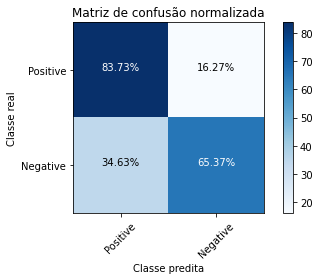

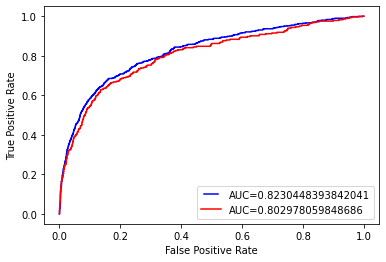

Métricas do modelo
Accuracy: 0.813932584269663
Precision: 0.36926147704590817
Recall: 0.6537102473498233
F1 Score: 0.4719387755102041
Cohens Kappa Score: 0.36943554161526904
Area Under Curve: 0.802978059848686


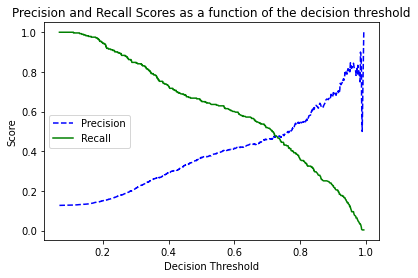

In [45]:
parameters = {'max_iter': [10000],'solver' : ['liblinear'],
              'C' : np.logspace(-4, 4, 20),'penalty' : ['l1', 'l2'], 'fit_intercept': [False,True]} 
model = LogisticRegression()

SEED = 1988
np.random.seed(SEED)
cv = KFold(3, shuffle=True)


clf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8,scoring='f1_micro')
clf.fit(X_train_transformed, y_resampled)
clf.best_params_
clf.predict(X_test_transformed)
score = clf.score(X_test_transformed, y_test)
results = cross_validate(model, X_resampled_transformed, y, cv=cv, return_train_score = False)
y_pred = clf.predict(X_test_transformed)

best_grid = clf.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test_transformed, y_test)

# Print result

print("LinearRegression")
print("------------------------------")
print(f'Parametros ótimos = {clf.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test_transformed, y_test, clf)
plot_roc(X_train_transformed,X_test_transformed,y_resampled,y_test,clf)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

plot_precision_recall_curve(clf, X_test_transformed,y_test)

In [46]:
nn_y_prd = evaluate(clf, X_test_transformed, th=0.73, y_tes=y_test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1942
           1       0.47      0.47      0.47       283

    accuracy                           0.87      2225
   macro avg       0.70      0.70      0.70      2225
weighted avg       0.87      0.87      0.87      2225



Fitting 3 folds for each of 48 candidates, totalling 144 fits
RandomForestClassifier
------------------------------
Parametros ótimos = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 500}
Score: 0.8570786516853932
------------------------------
Acurácia do modelo em teste 0.8570786516853932


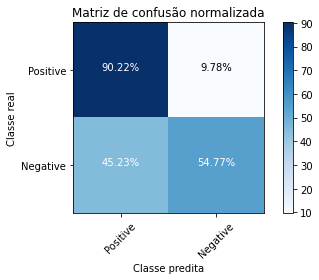

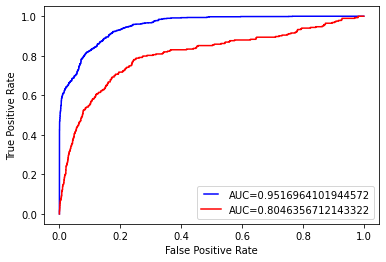

Métricas do modelo
Accuracy: 0.8570786516853932
Precision: 0.4492753623188406
Recall: 0.5477031802120141
F1 Score: 0.49363057324840764
Cohens Kappa Score: 0.4113707644567939
Area Under Curve: 0.8046356712143322


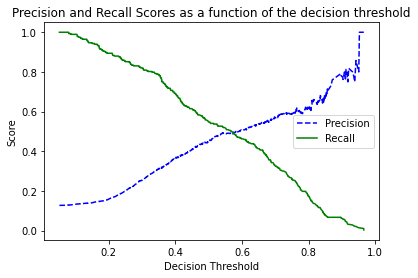

In [47]:
parameters = {'bootstrap': [True, False],
     'max_depth': [5,10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [500,1000],
    'criterion': ['gini', 'entropy']} 
model = RandomForestClassifier()

SEED = 1988
np.random.seed(SEED)
cv = KFold(3, shuffle=True)


rlf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8,scoring='f1_micro')
rlf.fit(X_train_transformed, y_resampled)
rlf.best_params_
rlf.predict(X_test_transformed)
score = rlf.score(X_test_transformed, y_test)
results = cross_validate(model, X_resampled_transformed, y, cv=cv, return_train_score = False)
y_pred = rlf.predict(X_test_transformed)

best_grid = rlf.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test_transformed, y_test)

# Print result

print("RandomForestClassifier")
print("------------------------------")
print(f'Parametros ótimos = {rlf.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test_transformed, y_test, rlf)
plot_roc(X_train_transformed,X_test_transformed,y_resampled,y_test,rlf)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

plot_precision_recall_curve(rlf, X_test_transformed,y_test)

In [52]:
nn_y_prd = evaluate(rlf, X_test_transformed, th=0.56, y_tes=y_test)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1942
           1       0.49      0.51      0.50       283

    accuracy                           0.87      2225
   macro avg       0.71      0.71      0.71      2225
weighted avg       0.87      0.87      0.87      2225



Fitting 3 folds for each of 16 candidates, totalling 48 fits
GradientBoostingClassifier
------------------------------
Parametros ótimos = {'learning_rate': 0.1, 'max_depth': 50, 'max_features': 2, 'n_estimators': 500}
Score: 0.813932584269663
------------------------------
Acurácia do modelo em teste 0.8804494382022472


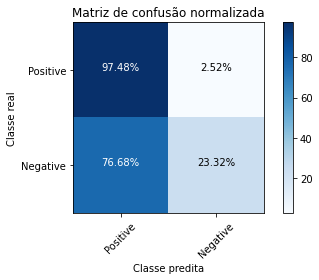

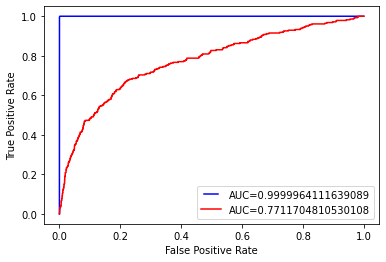

Métricas do modelo
Accuracy: 0.8804494382022472
Precision: 0.5739130434782609
Recall: 0.2332155477031802
F1 Score: 0.3316582914572864
Cohens Kappa Score: 0.2786363747166223
Area Under Curve: 0.7711704810530108


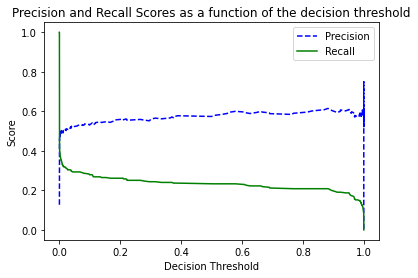

In [49]:
parameters = {"learning_rate" :[0.5, 0.1],
     'max_depth': [50, 100],
    'max_features': [2, 4],
    'n_estimators': [300, 500]} 
model = GradientBoostingClassifier()

SEED = 1988
np.random.seed(SEED)
cv = KFold(3, shuffle=True)


glf = GridSearchCV(model, parameters, cv=cv, verbose=5, n_jobs=8)
glf.fit(X_train_transformed, y_resampled)
glf.best_params_
glf.predict(X_test_transformed)
score = clf.score(X_test_transformed, y_test)
results = cross_validate(model, X_resampled_transformed, y, cv=cv, return_train_score = False)
y_pred = glf.predict(X_test_transformed)

best_grid = glf.best_estimator_
best_grid_eval = evaluate_model(best_grid, X_test_transformed, y_test)

# Print result

print("GradientBoostingClassifier")
print("------------------------------")
print(f'Parametros ótimos = {glf.best_params_}')
print(f'Score: {score}')
print("------------------------------")
print_confusion_for(X_test_transformed, y_test, glf)
plot_roc(X_train_transformed,X_test_transformed,y_resampled,y_test,glf)

print("Métricas do modelo")
print(f'Accuracy: {best_grid_eval["acc"]}')
print(f'Precision: {best_grid_eval["prec"]}')
print(f'Recall: {best_grid_eval["rec"]}')
print(f'F1 Score: {best_grid_eval["f1"]}')
print(f'Cohens Kappa Score: {best_grid_eval["kappa"]}')
print(f'Area Under Curve: {best_grid_eval["auc"]}')

plot_precision_recall_curve(glf, X_test_transformed,y_test)

In [50]:
nn_y_prd = evaluate(glf, X_test_transformed, th=0.5, y_tes=y_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1942
           1       0.57      0.23      0.33       283

    accuracy                           0.88      2225
   macro avg       0.74      0.60      0.63      2225
weighted avg       0.86      0.88      0.86      2225

